In [8]:
import nltk
from textblob import TextBlob


In [9]:
import tweepy # twitter api


In [10]:
import re # regex for cleaning the tweets
import pandas as pd
import numpy as np

In [11]:
# Twitter Api Credentials
consumer_key ="3kViWlWuPQ9TMnhdDYn7hxmeb"
consumer_secret = "hPZJmxD5Zhp3BCGPaQ9l1iPZOoEoL6Plmh82CuMlEAn6HkwqB0"
access_token = "3150218942-iblXfu1CcudXwb9Pd8ToxYiQ41tUlDJIKlTAREW"
access_token_secret = "57GgJYQ3GW8X4Dy9aOCJaW2B2Ba89Se7bfPetiQBts2iE"

In [12]:
#Function to access twitter api
def twitter():
    # Creating the authentication object
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    # Setting your access token and secret
    auth.set_access_token(access_token, access_token_secret) 
    # Creating the API object while passing in auth information
    api = tweepy.API(auth, wait_on_rate_limit = True)  
    return api

In [7]:
#getting tweets
# Creating tw object
tw = twitter()
# Extracting ImranKhan tweets
search = tw.user_timeline(screen_name="ImranKhanPTI", count = 200, lang ="en")
#  Printing last 10 tweets
print("10 recent tweets:\n")
for tweets in search[:10]:
    print(tweets.text + '\n')

10 recent tweets:

اہلِ کشمیر کیلئےخودارادیت کاحق سلامتی کونسل کیجانب سےاورعالمی قانون کےتحت  تسلیم شدہ ہے۔ہم کشمیری عوام کوجو ہندوتوا… https://t.co/v3abXMAYSa

آج ہم یومِ الحاقِ پاکستان کے تاریخی موقع کو یاد کرتے ہیں جب اہلِ کشمیر نے پاکستان کے ساتھ الحاق کی قرارداد منظور کی… https://t.co/wWpDzJt8PG

Kashmiris right of self-determination is recognised by the UNSC &amp; under international law. We will continue to figh… https://t.co/CPizgGOQm2

Today we  commemorate the historic occasion of Youm-i-Ilhaq-e-Pakistan, when Kashmiris passed a resolution for acce… https://t.co/7E12skIk02

عالمی ہوائی سفر پرعائد بڑی بندشوں کے باوجود ہم نےبیرون ملک پھنسے اپنےشہریوں اور سمندرپار کام کرنے والےپاکستانیوں کو… https://t.co/uVYBerHbAq

Despite massive disruptions in global air travel, we have fulfilled our promise of bringing back stranded Pakistani… https://t.co/sqdaFmPWEm

قوم سےمیری اپیل ہےکہ اس مثبت رجحان کے تسلسل کیلئےحفاظتی تدابیر پرعملدرآمدجاری رکھے۔عیدالاضحیٰ کےموقع پرسادگی اپنائی… https://

In [8]:
#creating dataframe
# Converting into dataframe (Column name Tweets)
df = pd.DataFrame([tweets.text for tweets in search], columns=['Tweets'])
df.head(10)

,Tweets
0,اہلِ کشمیر کیلئےخودارادیت کاحق سلامتی کونسل کی...
1,آج ہم یومِ الحاقِ پاکستان کے تاریخی موقع کو یا...
2,Kashmiris right of self-determination is recog...
3,Today we commemorate the historic occasion of...
4,عالمی ہوائی سفر پرعائد بڑی بندشوں کے باوجود ہم...
5,Despite massive disruptions in global air trav...
6,قوم سےمیری اپیل ہےکہ اس مثبت رجحان کے تسلسل کی...
7,ہمارےبدقسمت ہمسائےبھارت کےبرعکس پاکستان ان خوش...
8,I urge the nation to continue observing SOPs e...
9,Pak is amongst the fortunate countries where C...


In [9]:
# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 x = re.sub(r'^RT[\s]+', '', x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', '', x) 
 return x
df['Tweets'] = df['Tweets'].apply(clean)

In [10]:
#sentiment analysis
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Tweets'].apply(polarity)
print(df['polarity'])
df['subjectivity'] = df['Tweets'].apply(subjectivity)
print(df['subjectivity'])

0      0.000000
1      0.000000
2      0.142857
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.113636
9      0.400000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.342857
16    -0.155556
17    -0.500000
18     0.000000
19     0.000000
20     0.400000
21     0.050000
22     0.000000
23     0.000000
24    -0.037500
25    -0.125000
26     0.000000
27     0.800000
28     0.000000
29     0.421429
         ...   
170    0.000000
171    0.000000
172    0.000000
173   -0.007639
174   -0.020000
175    0.000000
176    0.000000
177    0.000000
178    0.000000
179    0.000000
180    0.500000
181    0.053333
182   -0.033333
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
188    0.000000
189    0.166667
190    0.000000
191    0.325000
192    0.000000
193    0.000000
194    0.000000
195   -0.025000
196    0.000000
197    0.100000
198    0.000000
199    0.000000
Name: polarity, Length: 

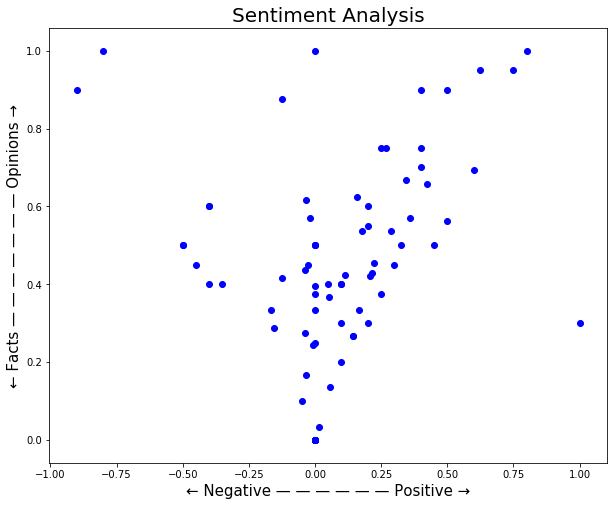

In [12]:
#data visualization
# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
 x = df.polarity.loc[Tweets]
 y = df.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='blue')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [13]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
 if x > 0:
     return 1
 elif x == 0:
     return 0
 else:
     return -1
df['analysis'] = df['polarity'].apply(ratio)
print(df['analysis'])

0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      0
8      1
9      1
10     0
11     0
12     0
13     0
14     0
15     1
16    -1
17    -1
18     0
19     0
20     1
21     1
22     0
23     0
24    -1
25    -1
26     0
27     1
28     0
29     1
      ..
170    0
171    0
172    0
173   -1
174   -1
175    0
176    0
177    0
178    0
179    0
180    1
181    1
182   -1
183    0
184    0
185    0
186    0
187    0
188    0
189    1
190    0
191    1
192    0
193    0
194    0
195   -1
196    0
197    1
198    0
199    0
Name: analysis, Length: 200, dtype: int64


In [14]:
df['analysis'].value_counts()

 0    139
 1     40
-1     21
Name: analysis, dtype: int64

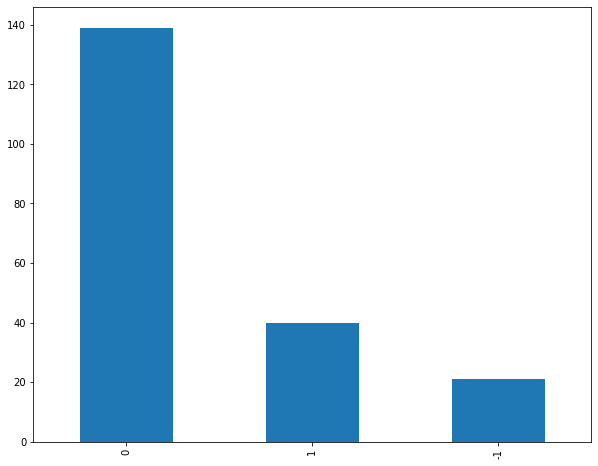

In [15]:
# Plotting
df['analysis'].value_counts().plot(kind = 'bar')
plt.show()